In [1]:
import sys
 
# setting path
sys.path.append('../')

import pydicom

from utils.display import display_dicom

In [2]:
sample_dcm_path = "/home/r079a/Desktop/de-identification/dataset/midi-test-data/input_data_half/402272604/2.5.534.0.2.8336183.5.286.1916365342594917934/2.5.534.0.2.8336183.5.286.1934520902331114070/00000159.dcm"

In [3]:
ds = pydicom.dcmread(sample_dcm_path)

In [4]:
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 178
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 2.5.534.0.2.8336183.5.286.1056983558785517134
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['DERIVED', 'PRIMARY', 'DCE', 'PE1']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 2.5.534.0.2.8336183.5.286.1056983558785517134
(0008, 0020) Study Date                          DA: '20191029'
(0008, 0021) Series Date                         DA: '20191029'
(0

In [5]:
for element in ds.elements():
    if element.VR == 'OW':
        print(element.tag, element.name)
        # print(element.value)

(7fe0, 0010) Pixel Data


In [6]:
print(ds.pixel_array.shape)

(256, 256)


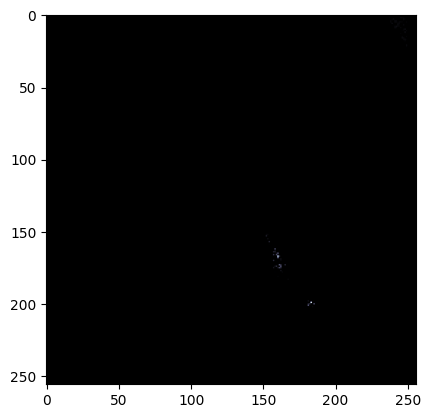

In [7]:
display_dicom(ds)

In [8]:
from dcm_anonymizers.phi_detectors import DcmRobustPHIDetector
from dcm_anonymizers.img_anonymizers import DCMImageAnonymizer

In [9]:
phi_detector = DcmRobustPHIDetector(logging=False)
img_anonymizer = DCMImageAnonymizer(phi_detector=phi_detector)

In [10]:
changed = img_anonymizer.anonymize_dicom_image_data(ds)
print(changed)

False


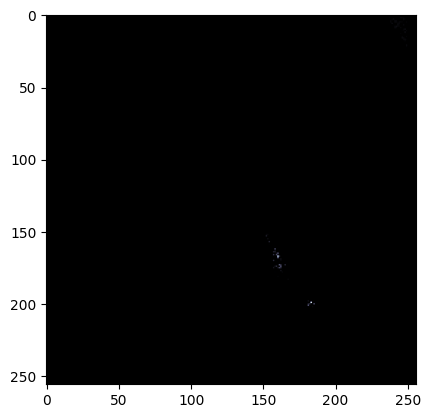

In [11]:
display_dicom(ds)